In [1]:
# get environment variables
import os
import sys
from dotenv import load_dotenv, find_dotenv
import datetime
import numpy as np

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

sys.path.append(os.environ.get('srcdir'))

# always reload modules marked with "%aimport"
%load_ext autoreload
%autoreload 1

from features.resample_roms import resample
%aimport features.resample_roms

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

hr_grd_path = os.path.join(os.environ.get("prodir"),'waom1_small_grd.nc')
hr_grd = xr.open_dataset(hr_grd_path)

lr_grd_path = os.path.join(os.environ.get("prodir"),'waom10_small_grd.nc')
lr_grd = xr.open_dataset(lr_grd_path)

lr_tds_path =  os.path.join('/home/ubuntu/raijin/g/data2/gh9/oxr581/waom10_v2.0_frc','waom10_small_tds.nc')
lr_tds = xr.open_dataset(lr_tds_path)

In [3]:
lr_tds

<xarray.Dataset>
Dimensions:             (eta_rho: 530, string: 4, tide_period: 10, xi_rho: 630)
Coordinates:
  * tide_period         (tide_period) timedelta64[ns] 0 days 12:25:14.163600 ...
Dimensions without coordinates: eta_rho, string, xi_rho
Data variables:
    lat_rho             (eta_rho, xi_rho) float64 ...
    lon_rho             (eta_rho, xi_rho) float64 ...
    mask_rho            (eta_rho, xi_rho) float64 ...
    tide_Eamp           (tide_period, eta_rho, xi_rho) float64 ...
    tide_Ephase         (tide_period, eta_rho, xi_rho) float64 ...
    tide_Cphase         (tide_period, eta_rho, xi_rho) float64 ...
    tide_Cangle         (tide_period, eta_rho, xi_rho) float64 ...
    tide_Cmin           (tide_period, eta_rho, xi_rho) float64 ...
    tide_Cmax           (tide_period, eta_rho, xi_rho) float64 ...
    tidal_constituents  (string, tide_period) |S1 ...
Attributes:
    Type:       ROMS Tidal Forcing File
    Title:      Forcing for ESPRESSO  domain
    grid_file:  /home/

In [39]:
dummy = np.empty((lr_tds.tide_period.size,hr_grd.eta_rho.size,hr_grd.xi_rho.size))

ds = xr.Dataset({'tide_Eamp':(['tide_period','eta_rho','xi_rho'], dummy),
                 'tide_Ephase':(['tide_period','eta_rho','xi_rho'], dummy),
                 'tide_Cphase':(['tide_period','eta_rho','xi_rho'], dummy),
                 'tide_Cangle':(['tide_period','eta_rho','xi_rho'], dummy),
                 'tide_Cmin':(['tide_period','eta_rho','xi_rho'], dummy),
                 'tide_Cmax':(['tide_period','eta_rho','xi_rho'], dummy)},
                   coords={'tide_period':(['tide_period'],lr_tds.tide_period.values)})
ds.attrs = lr_tds.attrs
ds['tidal_constituents'] = lr_tds.tidal_constituents

for idx in range(lr_tds.tide_period.size):
    print('processing period: ',idx)
    for var in ['tide_Eamp','tide_Ephase','tide_Cphase','tide_Cangle','tide_Cmin','tide_Cmax']:
        print('for variable: '+var)
        ds[var][idx] = resample(lr_grd['lon_rho'].values,lr_grd['lat_rho'].values,
                                hr_grd['lon_rho'].values,hr_grd['lat_rho'].values,
                                lr_tds[var][idx].values)

#save month as netcdf file
out_path = os.path.join('/home/ubuntu/raijin/g/data2/gh9/oxr581/waom1_v2.0_frc','waom1_tds.nc')
    
print("Saving month to "+out_path)
ds.to_netcdf(out_path,'w')

processing period:  0
for variable: tide_Eamp
for variable: tide_Ephase
for variable: tide_Cphase
for variable: tide_Cangle
for variable: tide_Cmin
for variable: tide_Cmax
processing period:  1
for variable: tide_Eamp
for variable: tide_Ephase
for variable: tide_Cphase
for variable: tide_Cangle
for variable: tide_Cmin
for variable: tide_Cmax
processing period:  2
for variable: tide_Eamp
for variable: tide_Ephase
for variable: tide_Cphase
for variable: tide_Cangle
for variable: tide_Cmin
for variable: tide_Cmax
processing period:  3
for variable: tide_Eamp
for variable: tide_Ephase
for variable: tide_Cphase
for variable: tide_Cangle
for variable: tide_Cmin
for variable: tide_Cmax
processing period:  4
for variable: tide_Eamp
for variable: tide_Ephase
for variable: tide_Cphase
for variable: tide_Cangle
for variable: tide_Cmin
for variable: tide_Cmax
processing period:  5
for variable: tide_Eamp
for variable: tide_Ephase
for variable: tide_Cphase
for variable: tide_Cangle
for variable: ti

In [45]:
plt.close()
ds['tide_Eamp'][0]


<xarray.DataArray 'tide_Eamp' (eta_rho: 5300, xi_rho: 6300)>
array([[ 0.00351 ,  0.00351 ,  0.00351 , ...,  0.00429 ,  0.00429 ,  0.00429 ],
       [ 0.00351 ,  0.00351 ,  0.00351 , ...,  0.00429 ,  0.00429 ,  0.00429 ],
       [ 0.00351 ,  0.00351 ,  0.00351 , ...,  0.00429 ,  0.00429 ,  0.00429 ],
       ..., 
       [ 0.006433,  0.006433,  0.006433, ...,  0.01596 ,  0.01596 ,  0.01596 ],
       [ 0.006433,  0.006433,  0.006433, ...,  0.01596 ,  0.01596 ,  0.01596 ],
       [ 0.006433,  0.006433,  0.006433, ...,  0.01596 ,  0.01596 ,  0.01596 ]])
Coordinates:
    tide_period  timedelta64[ns] 12:25:14.163600
Dimensions without coordinates: eta_rho, xi_rho

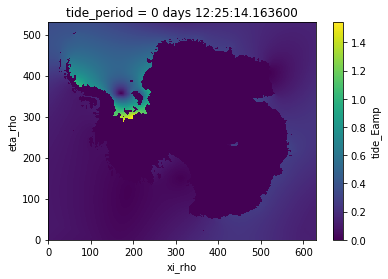

In [41]:
plt.close()
lr_tds.tide_Eamp[0].plot()
plt.show()

In [42]:
hr_test = resample(lr_grd['lon_rho'].values,lr_grd['lat_rho'].values,
                                hr_grd['lon_rho'].values,hr_grd['lat_rho'].values,
                                lr_tds.tide_Eamp[0].values)

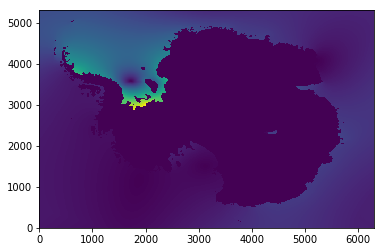

In [43]:
plt.close()
plt.pcolormesh(hr_test)
plt.show()

In [3]:
import xarray as xr
import matplotlib.pyplot as plt

pth = os.path.join(os.environ.get("prodir"),'waom1_tds.nc')
tds = xr.open_dataset(pth)

OverflowError: Python int too large to convert to C long